In [168]:
import pandas as pd

In [169]:
import numpy as np

In [170]:
import json

In [171]:
import seaborn as sns

In [172]:
import matplotlib.pyplot as plt

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [176]:
from sklearn.svm import SVC

In [177]:
from sklearn.metrics import roc_auc_score

In [178]:
from sklearn.metrics import roc_curve, auc

In [179]:
import sklearn.metrics as metrics


In [180]:
df_train=pd.read_json("fall2019-survey-M03.json")

In [181]:
df_train.head(5)

,Destination.City,Origin.City,Airline.Status,Age,Gender,Price.Sensitivity,Year.of.First.Flight,Flights.Per.Year,Loyalty,Type.of.Travel,...,Arrival.Delay.in.Minutes,Flight.cancelled,Flight.time.in.minutes,Flight.Distance,Likelihood.to.recommend,olong,olat,dlong,dlat,freeText
0,"Houston, TX","Minneapolis, MN",Blue,66,Female,1,2009,15,-0.3043,Business travel,...,0.0,No,142.0,1034,5.0,-93.2798,44.9782,-95.3935,29.7843,NaN
1,"Providence, RI","Chicago, IL",Blue,47,Male,0,2007,1,0.7778,Business travel,...,21.0,No,93.0,842,10.0,-87.8954,41.8271,-71.3974,41.7763,NaN
2,"Chicago, IL","Austin, TX",Blue,80,Male,1,2010,36,-0.7143,Personal Travel,...,0.0,No,129.0,978,6.0,-97.7615,30.3585,-87.8954,41.8271,NaN
3,"Cincinnati, OH","Miami, FL",Silver,35,Male,2,2005,21,-0.5000,Business travel,...,28.0,No,126.0,948,8.0,-80.2314,26.1756,-84.4620,39.1855,NaN
4,"Denver, CO","Cleveland, OH",Gold,63,Female,1,2011,18,-0.5000,Personal Travel,...,0.0,No,192.0,1201,6.0,-81.6054,41.4436,-104.9551,39.7108,NaN


In [182]:
df_train.drop(["Destination.City","Origin.City","Flight.date","Partner.Code","olong","olat","dlong","dlat","freeText"], axis=1, inplace=True)

In [183]:
print(pd.isnull(df_train).sum())

Airline.Status                      0
Age                                 0
Gender                              0
Price.Sensitivity                   0
Year.of.First.Flight                0
Flights.Per.Year                    0
Loyalty                             0
Type.of.Travel                      0
Total.Freq.Flyer.Accts              0
Shopping.Amount.at.Airport          0
Eating.and.Drinking.at.Airport      0
Class                               0
Day.of.Month                        0
Partner.Name                        0
Origin.State                        0
Destination.State                   0
Scheduled.Departure.Hour            0
Departure.Delay.in.Minutes        218
Arrival.Delay.in.Minutes          242
Flight.cancelled                    0
Flight.time.in.minutes            242
Flight.Distance                     0
Likelihood.to.recommend             1
dtype: int64


In [184]:
df_train.shape

(10282, 23)

In [185]:
df_train.iloc[2,2]

'Male'

In [186]:
df_train.loc[pd.isnull(df_train["Likelihood.to.recommend"])]

,Airline.Status,Age,Gender,Price.Sensitivity,Year.of.First.Flight,Flights.Per.Year,Loyalty,Type.of.Travel,Total.Freq.Flyer.Accts,Shopping.Amount.at.Airport,...,Partner.Name,Origin.State,Destination.State,Scheduled.Departure.Hour,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,Flight.cancelled,Flight.time.in.minutes,Flight.Distance,Likelihood.to.recommend
2497,Silver,36,Male,2,2010,18,-0.0909,Business travel,2,0,...,Northwest Business Airlines Inc.,Wyoming,Utah,6,0.0,0.0,No,43.0,162,NaN


In [187]:
df_train.drop([2497], axis=0, inplace=True)

In [188]:
df_train["Departure.Delay.in.Minutes"].median()

0.0

In [189]:
df_train["Flight.time.in.minutes"].median()

94.0

In [190]:
df_train["Arrival.Delay.in.Minutes"].median()

0.0

In [191]:
df_train["Departure.Delay.in.Minutes"].fillna(df_train["Departure.Delay.in.Minutes"].median(), inplace= True)

In [192]:
df_train["Flight.time.in.minutes"].fillna(df_train["Flight.time.in.minutes"].median(), inplace= True)

In [193]:
df_train["Arrival.Delay.in.Minutes"].fillna(df_train["Arrival.Delay.in.Minutes"].median(), inplace= True)

In [194]:
df_train.dtypes

Airline.Status                     object
Age                                 int64
Gender                             object
Price.Sensitivity                   int64
Year.of.First.Flight                int64
Flights.Per.Year                    int64
Loyalty                           float64
Type.of.Travel                     object
Total.Freq.Flyer.Accts              int64
Shopping.Amount.at.Airport          int64
Eating.and.Drinking.at.Airport      int64
Class                              object
Day.of.Month                        int64
Partner.Name                       object
Origin.State                       object
Destination.State                  object
Scheduled.Departure.Hour            int64
Departure.Delay.in.Minutes        float64
Arrival.Delay.in.Minutes          float64
Flight.cancelled                   object
Flight.time.in.minutes            float64
Flight.Distance                     int64
Likelihood.to.recommend           float64
dtype: object

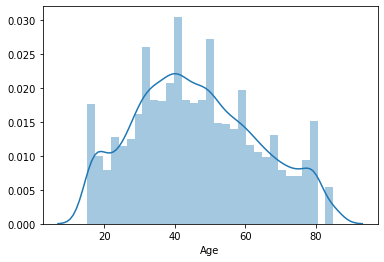

In [195]:
sns.distplot(df_train["Age"])

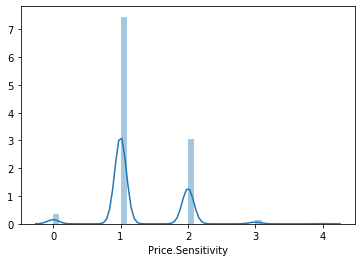

In [196]:
sns.distplot(df_train["Price.Sensitivity"])

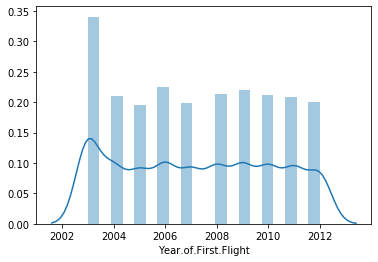

In [197]:
sns.distplot(df_train["Year.of.First.Flight"])

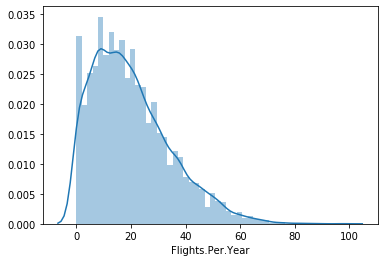

In [198]:
sns.distplot(df_train["Flights.Per.Year"])

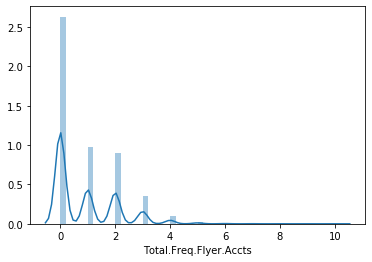

In [199]:
sns.distplot(df_train["Total.Freq.Flyer.Accts"])

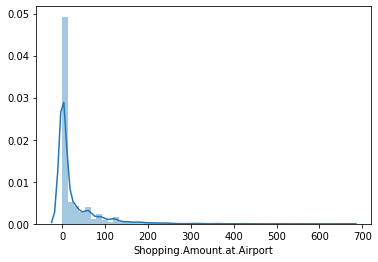

In [200]:
sns.distplot(df_train["Shopping.Amount.at.Airport"])

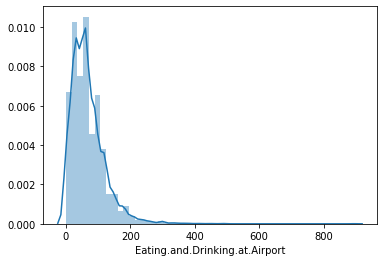

In [201]:
sns.distplot(df_train["Eating.and.Drinking.at.Airport"])

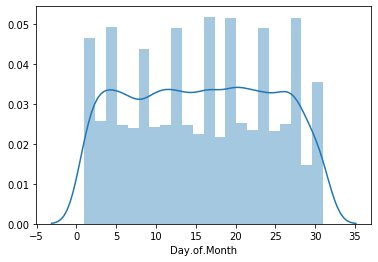

In [202]:
sns.distplot(df_train["Day.of.Month"])

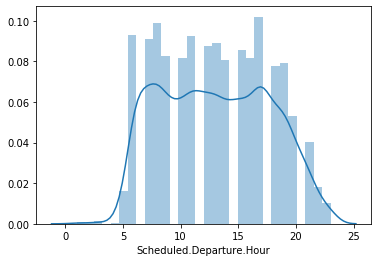

In [203]:
sns.distplot(df_train["Scheduled.Departure.Hour"])

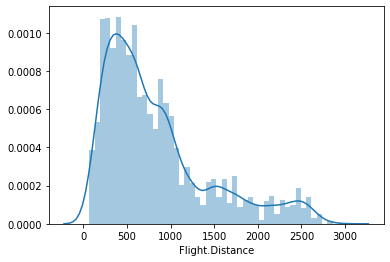

In [204]:
sns.distplot(df_train["Flight.Distance"])

In [205]:
df_train["Airline.Status"].unique()

array(['Blue', 'Silver', 'Gold', 'Platinum'], dtype=object)

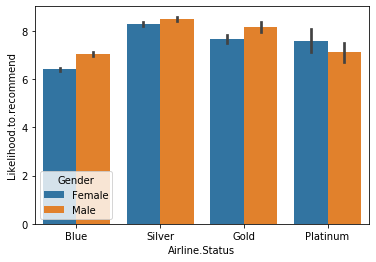

In [206]:
sns.barplot(x="Airline.Status", y="Likelihood.to.recommend", hue="Gender", data=df_train)

In [207]:
df_train["Customer.Type"]=pd.cut(x=df_train["Likelihood.to.recommend"], bins=[0,6,8,10], labels=["Detractors","Passive","Promoters"])

In [208]:
df_train.head(2)

,Airline.Status,Age,Gender,Price.Sensitivity,Year.of.First.Flight,Flights.Per.Year,Loyalty,Type.of.Travel,Total.Freq.Flyer.Accts,Shopping.Amount.at.Airport,...,Origin.State,Destination.State,Scheduled.Departure.Hour,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,Flight.cancelled,Flight.time.in.minutes,Flight.Distance,Likelihood.to.recommend,Customer.Type
0,Blue,66,Female,1,2009,15,-0.3043,Business travel,0,5,...,Minnesota,Texas,11,0.0,0.0,No,142.0,1034,5.0,Detractors
1,Blue,47,Male,0,2007,1,0.7778,Business travel,2,0,...,Illinois,Rhode Island,20,33.0,21.0,No,93.0,842,10.0,Promoters


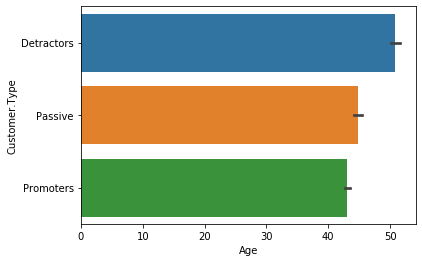

In [209]:
sns.barplot(x="Age", y="Customer.Type", data=df_train)

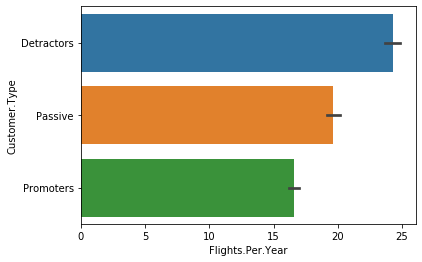

In [210]:
sns.barplot(x="Flights.Per.Year", y="Customer.Type", data=df_train)

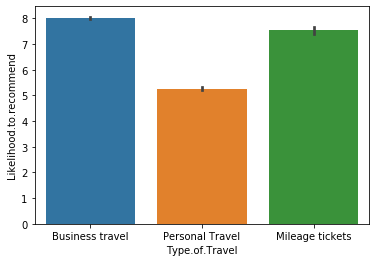

In [211]:
sns.barplot(x="Type.of.Travel", y="Likelihood.to.recommend", data=df_train)

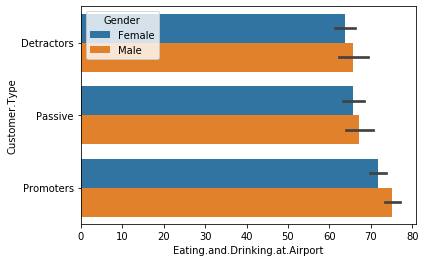

In [212]:
sns.barplot(x="Eating.and.Drinking.at.Airport", y="Customer.Type", hue="Gender", data=df_train)

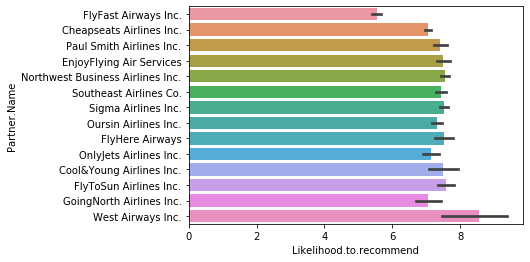

In [213]:
sns.barplot(x="Likelihood.to.recommend", y="Partner.Name", data=df_train)

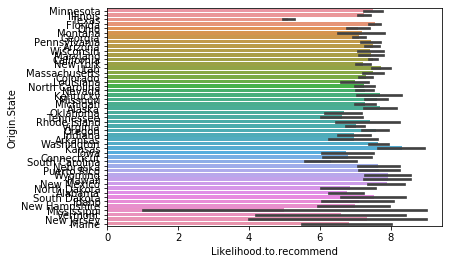

In [214]:
sns.barplot(x="Likelihood.to.recommend", y="Origin.State", data=df_train)

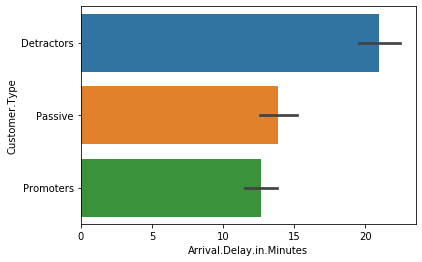

In [215]:
sns.barplot(x="Arrival.Delay.in.Minutes", y="Customer.Type", data=df_train)

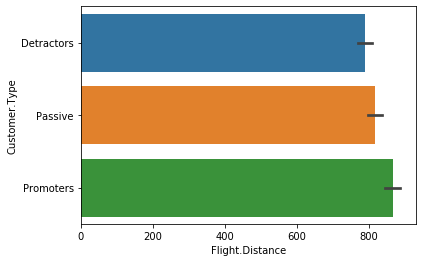

In [216]:
sns.barplot(x="Flight.Distance", y="Customer.Type", data=df_train)

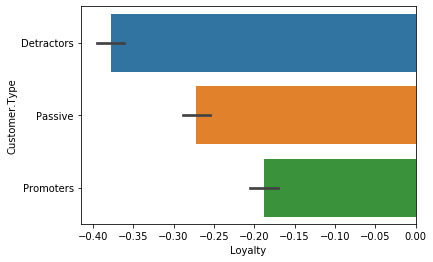

In [217]:
sns.barplot(x="Loyalty", y="Customer.Type", data=df_train)

In [218]:
list(df_train.columns)

['Airline.Status',
 'Age',
 'Gender',
 'Price.Sensitivity',
 'Year.of.First.Flight',
 'Flights.Per.Year',
 'Loyalty',
 'Type.of.Travel',
 'Total.Freq.Flyer.Accts',
 'Shopping.Amount.at.Airport',
 'Eating.and.Drinking.at.Airport',
 'Class',
 'Day.of.Month',
 'Partner.Name',
 'Origin.State',
 'Destination.State',
 'Scheduled.Departure.Hour',
 'Departure.Delay.in.Minutes',
 'Arrival.Delay.in.Minutes',
 'Flight.cancelled',
 'Flight.time.in.minutes',
 'Flight.Distance',
 'Likelihood.to.recommend',
 'Customer.Type']

In [219]:
df_train = pd.get_dummies(df_train, columns=["Airline.Status", "Gender", "Type.of.Travel", "Class", "Partner.Name", "Origin.State", "Destination.State", 
                                             "Flight.cancelled"])

In [220]:
list(df_train.columns)

['Age',
 'Price.Sensitivity',
 'Year.of.First.Flight',
 'Flights.Per.Year',
 'Loyalty',
 'Total.Freq.Flyer.Accts',
 'Shopping.Amount.at.Airport',
 'Eating.and.Drinking.at.Airport',
 'Day.of.Month',
 'Scheduled.Departure.Hour',
 'Departure.Delay.in.Minutes',
 'Arrival.Delay.in.Minutes',
 'Flight.time.in.minutes',
 'Flight.Distance',
 'Likelihood.to.recommend',
 'Customer.Type',
 'Airline.Status_Blue',
 'Airline.Status_Gold',
 'Airline.Status_Platinum',
 'Airline.Status_Silver',
 'Gender_Female',
 'Gender_Male',
 'Type.of.Travel_Business travel',
 'Type.of.Travel_Mileage tickets',
 'Type.of.Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'Partner.Name_Cheapseats Airlines Inc.',
 'Partner.Name_Cool&Young Airlines Inc.',
 'Partner.Name_EnjoyFlying Air Services',
 'Partner.Name_FlyFast Airways Inc.',
 'Partner.Name_FlyHere Airways',
 'Partner.Name_FlyToSun Airlines Inc.',
 'Partner.Name_GoingNorth Airlines Inc.',
 'Partner.Name_Northwest Business Airlines Inc.'

In [221]:
df_train= df_train.astype({"Customer.Type":object})

In [222]:
df_train.loc[df_train["Customer.Type"] == "Promoters", "Customer.Type"] = 0
df_train.loc[df_train["Customer.Type"] == "Detractors", "Customer.Type"] = 1
df_train.loc[df_train["Customer.Type"] == "Passive", "Customer.Type"] = 0

In [223]:
target = ["Customer.Type"]

In [224]:
predictors_list = list(df_train)

In [225]:
target_likelihood = ["Likelihood.to.recommend"]

In [226]:
predictors = list(set(predictors_list) - set(target) - set(target_likelihood))

In [227]:
X=df_train[predictors].copy(deep=True)

In [228]:
y=df_train[target].copy(deep=True)

In [238]:
y["Customer.Type"].value_counts()

0    7011
1    3270
Name: Customer.Type, dtype: int64

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
len(y_train)

8224

In [230]:
rf = RandomForestClassifier(n_estimators=500, criterion="entropy", max_depth=20, min_samples_split=5)

In [231]:
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
y_predict = rf.predict(X_test)

In [138]:
confusion_matrix(y_test, y_predict)

array([[1301,  119],
       [ 213,  424]])

In [139]:
accuracy_score(y_test, y_predict)

0.8385999027710258

In [140]:
f1_score(y_test, y_predict, average = "weighted")


0.8347567369606662

In [141]:
precision_score(y_test, y_predict, average = "weighted")

0.8350141965724779

In [142]:
recall_score(y_test, y_predict, average = "weighted")

0.8385999027710258

In [143]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)

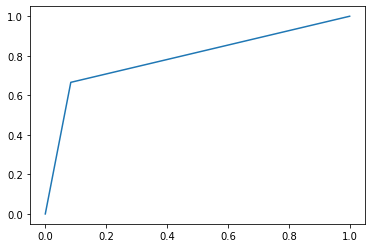

In [149]:
plt.plot(fpr,tpr)

In [156]:
auc = np.trapz(tpr,fpr)

In [152]:
print(auc)

0.7909086386450571


In [251]:
svcclassifier = SVC(kernel='linear')

In [252]:
svcclassifier.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [247]:
y_predict=svcclassifier.predict(X_test)

In [248]:
confusion_matrix(y_test, y_predict)

array([[1420,    0],
       [ 637,    0]])

In [249]:
accuracy_score(y_test, y_predict)

0.690325717063685

In [250]:
classification_report(y_test, y_predict)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.69      1.00      0.82      1420\n           1       0.00      0.00      0.00       637\n\n    accuracy                           0.69      2057\n   macro avg       0.35      0.50      0.41      2057\nweighted avg       0.48      0.69      0.56      2057\n'